# FSD Audio Classifier
##  01. Labelling Classes and Initial EDA on Audio Tags

- Dataset: [FreeSoundDataset50K](https://zenodo.org/record/4060432#.X5ySHHhKgWo)

- In this notebook we will perform initial EDA on the Audio Tags to inform how  we labelled our audio classes, which become the target feature for our predicitive models. 

- After the Tag EDA, we will feature engineer our Class labels, binning the 50,000 audio files into 8 distinct classes based on their 20,000 unique audio Tags.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dev_info = pd.read_json('data/FSD50K.metadata/dev_clips_info_FSD50K.json').T

In [3]:
eval_info = pd.read_json('data/FSD50K.metadata/eval_clips_info_FSD50K.json').T

In [4]:
dev_info['track_num'] = dev_info.index
dev_info['wav_name'] = dev_info['track_num'].apply(lambda x: str(x) + '.wav')
dev_info['png_name'] = dev_info['track_num'].apply(lambda x: str(x) + '.png')
dev_info = dev_info.sort_index()

In [5]:
print(dev_info.shape)
dev_info.head()

(40966, 8)


,title,description,tags,license,uploader,track_num,wav_name,png_name
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png


In [6]:
print(eval_info.shape)
eval_info.head()

(10231, 5)


,title,description,tags,license,uploader
391277,Spring Birds Forest 04 Amp.wav,An other birds singings recorded on the mornin...,"[birdsong, bird, forest, environment, morning,...",http://creativecommons.org/publicdomain/zero/1.0/,ANARKYA
392115,Snap of fingers,a snap of one's fingers,"[fingers, finger, 5maudio17, uam, fingersnap]",http://creativecommons.org/publicdomain/zero/1.0/,edton
411438,Pouring Water,A sound of Hot water pouring into a cup,"[fill, can, beverage, glass, water, pour, drin...",http://creativecommons.org/publicdomain/zero/1.0/,edsward
395238,Tearing papers.wav,Tearing papers with reverb.\r\n\r\nI used a Sa...,"[ripping, papier, paper, scheuren, rip, tearing]",http://creativecommons.org/licenses/by/3.0/,ellenmentor
425681,sigh.mp3,i recorded me sighing.,"[sad, happy, sigh]",http://creativecommons.org/publicdomain/zero/1.0/,Camo1018


## Feature Engineering Class Labels Audio Files 
- The EDA for the Audio Tags is below this feature engineering section as it is informative to iteratively analyze the Tags of the audio files have not been binned into a Class groups. 

- The EDA below are the results after the final iteration of labelling our audio classes.

### Function Creating 15 Class Labels (archived)

In [8]:
human_words = ['human', 'man', 'male', 'voice','woman','female',
                'talk', 'talking', 'announcement', 'announcer',
              'conversations', 'people', 'chant', 'whisper',
              'speech','yelling', 'yell']

comedy_words = ['comedy', 'laughing', 'laughs', 'laugh']

foley_words = ['keyboard', 'keys', 'coin', 'money', 'scratch', 'coins', 
               'crackle', 'eating', 'click', 'zipper', 'tools', 'foley', 'breath', 'cough',
              'creaking', 'squeak', 'skateboard', 'bicycle', 'bike', 'crunch',
              'crinkle', 'thump', 'noise', 'plastic', 'sfx', 'typing', 'zip', 'knife',
              'tape', 'breathe', 'brush', 'toothbrush', 'velcro', 'cup', 'scissors',
               'swish', 'hands', 'flame', 'shuffling', 'eat', 'sigh', 'pen']

baby_words = ['crying','baby', 'scream', 'screaming', 'children','child','kids', 'boy', 'girl']

animal_words = ['dog', 'dogs', 'cat', 'bark', 'purr', 'frogs','frog', 'cricket', 
                'crickets', 'birds', 'bird', 'warbler', 'insects','birdsong',
               'bee', 'insect','pigs', 'pig','animal-sounds','grasshopper','bugs',
               'ducks', 'rooster', 'owl', 'monkey', 'animals', 'cattle',
               'hen', 'hens', 'fart','flatulence', 'animal', 'belch', 'burp',
                'neighing','snorting','whinny', 'whinnie','snort', 'breathing',
               'yawn','farm', 'sneeze', 'snore', 'growl', 'throat','canary', 'geese']

music_words = ['instrument', 'guitar', 'piano', 'bell', 'shaker', 
               'sax', 'clarinet', 'riff', 'single-note', 'chord',
              'electric-piano', 'bass', 'cello', 'organ', 'violin', 'viola', 
               'double-bass', 'classical-guitar', 'chordophone',
               'transverse-flute','bassoon', 'flute', 'trumpet', 'harmonica',
              'music', 'brass', 'saxophone', 'orchestra', 'drumloop', 'chords',
              'bells', 'electro', 'groovy', 'world-music', 'clink', 'horn',
              'harp', 'theremin', 'xylophone', 'ukulele', 'vibraphone',
              'metalic', 'singing', 'vocals', 'gong', 'doorbell', 'ringtone',
              'marimba', 'singing-bowl', 'windchime']

percussion_words = ['drums', 'drum', 'bass-drum', 'percussion', 
                    'cymbal' ,'hi-hat', 'hihat','tambourine''xylophone', 'didgeridoo', 'snare',
                   'tambourine', 'fingersnap', 'tabla', 'percussive', 'clapping', 'rattle',
                   'bassdrum']

nature_words = ['water', 'rain', 'wind', 'ocean', 'waterfall', 'peeing',
                'whoosh', 'nature', 'faucet', 'boiling', 'dripping', 'flush', 'liquid',
               'river', 'flushing']

machinery_words = ['car', 'engine', 'bus', 'driving', 'drive', 'mixer',
                   'machine', 'drill','blender', 'blendering', 'trains','train', 'metro',
                  'helicopter', 'motorcycle', 'airplane', 'mechanical', 'vacuum', 'truck',
                  'cars', 'subway', 'motor', 'electric']

ambient_words = ['environmental-sounds-research','applause', 'clap', 'crowd', 'traffic',
                'air', 'sea', 'fan', 'london', 'aviation','aircraft', 'city', 'ferry',
                'ship']

door_words = ['door', 'opening', 'closing', 'drawer', 'shut', 'close', 'gate', 'doorslam',
             'breaking', 'tear']

fire_words = ['lighter','fire', 'spark', 'explosion', 'glass', 'thunder', 
              'lightning', 'gun', 'crack','burning', 'bang', 'banging', 'hit',
             'beep', 'beeping', 'kettle', 'alarm', 'phone', 'fireworks', 'breaking-glass',
             'pistol', 'rifle', 'shot', 'pop','break','steam', 'siren', 'shotgun']

movement_words = ['footsteps', 'clop', 'walk', 'walking','steps', 'hooves', 'trot',
                  'gallop', 'horse', 'running', 'footstep']

# combine foley with household
household_words = ['cooking', 'pot', 'pan', 'slicing', 'cutting', 'cut', 'writing', 'write'
                   'sharpening', 'clock', 'ticking', 'paper', 'camera', 'metal', 'hammer', 'telephone',
                  'tap', 'tapping', 'kitchen', 'tool', 'saw', 'printer', 'wood', 'microwave',
                  'bathroom']




def cat_labeler_15(tag_list):
    if set(human_words).intersection(tag_list):
        return 0 #'human'
    elif set(comedy_words).intersection(tag_list):
        return 1 #'comedy'
    elif set(door_words).intersection(tag_list):
        return 2 #'door'  
    elif set(baby_words).intersection(tag_list):
        return 3 #'baby'
    elif set(animal_words).intersection(tag_list):
        return 4 #'animal'    
    elif set(music_words).intersection(tag_list):
        return 5 #'music'
    elif set(percussion_words).intersection(tag_list):
        return 6 #'percussion'
    elif set(machinery_words).intersection(tag_list):
        return 7 #'machines'
    elif set(ambient_words).intersection(tag_list):
        return  8#'ambient'
    elif set(fire_words).intersection(tag_list):
        return 9 #'fire'   
    elif set(movement_words).intersection(tag_list):
        return 10 #'movement'
    elif set(household_words).intersection(tag_list):
        return 11 #'household'
    elif set(foley_words).intersection(tag_list):
        return 12 #'foley'  
    elif set(nature_words).intersection(tag_list):
        return 13 #'nature'
    else:
        return 14 #'other'


## Function Creating 10 Class Labels (archived)

In [9]:
human_words = ['human', 'man', 'male', 'voice','woman','female',
                'talk', 'talking', 'announcement', 'announcer',
              'conversations', 'people', 'chant', 'whisper',
              'speech','yelling', 'yell', 
               
               'comedy', 'laughing', 'laughs', 'laugh']

baby_words = ['crying','baby', 'scream', 'screaming', 'children','child','kids', 'boy', 'girl']


noise_words = ['keyboard', 'keys', 'coin', 'money', 'scratch', 'coins', 
               'crackle', 'eating', 'click', 'zipper', 'tools', 'foley', 'breath', 'cough',
              'creaking', 'squeak', 'skateboard', 'bicycle', 'bike', 'crunch',
              'crinkle', 'thump', 'noise', 'plastic', 'sfx', 'typing', 'zip', 'knife',
              'tape', 'breathe', 'brush', 'toothbrush', 'velcro', 'cup', 'scissors',
               'swish', 'hands', 'flame', 'shuffling', 'eat', 'sigh', 'pen',
              
              'cooking', 'pot', 'pan', 'slicing', 'cutting', 'cut', 'writing', 'write'
                   'sharpening', 'clock', 'ticking', 'paper', 'camera', 'metal', 'hammer', 'telephone',
                  'tap', 'tapping', 'kitchen', 'tool', 'saw', 'printer', 'wood', 'microwave',
                  'bathroom',
                  
                  'drums', 'drum', 'bass-drum', 'percussion', 
                    'cymbal' ,'hi-hat', 'hihat','tambourine''xylophone', 'didgeridoo', 'snare',
                   'tambourine', 'fingersnap', 'tabla', 'percussive', 'clapping', 'rattle',
                   'bassdrum']

animal_words = ['dog', 'dogs', 'cat', 'bark', 'purr', 'frogs','frog', 'cricket', 
                'crickets', 'birds', 'bird', 'warbler', 'insects','birdsong',
               'bee', 'insect','pigs', 'pig','animal-sounds','grasshopper','bugs',
               'ducks', 'rooster', 'owl', 'monkey', 'animals', 'cattle',
               'hen', 'hens', 'fart','flatulence', 'animal', 'belch', 'burp',
                'neighing','snorting','whinny', 'whinnie','snort', 'breathing',
               'yawn','farm', 'sneeze', 'snore', 'growl', 'throat','canary', 'geese']

music_words = ['instrument', 'guitar', 'piano', 'bell', 'shaker', 
               'sax', 'clarinet', 'riff', 'single-note', 'chord',
              'electric-piano', 'bass', 'cello', 'organ', 'violin', 'viola', 
               'double-bass', 'classical-guitar', 'chordophone',
               'transverse-flute','bassoon', 'flute', 'trumpet', 'harmonica',
              'music', 'brass', 'saxophone', 'orchestra', 'drumloop', 'chords',
              'bells', 'electro', 'groovy', 'world-music', 'clink', 'horn',
              'harp', 'theremin', 'xylophone', 'ukulele', 'vibraphone',
              'metalic', 'singing', 'vocals', 'gong', 'doorbell', 'ringtone',
              'marimba', 'singing-bowl', 'windchime']

ambient_words = ['environmental-sounds-research','applause', 'clap', 'crowd', 'traffic',
                'air', 'sea', 'fan', 'london', 'aviation','aircraft', 'city', 'ferry',
                'ship',
                
                'water', 'rain', 'wind', 'ocean', 'waterfall', 'peeing',
                'whoosh', 'nature', 'faucet', 'boiling', 'dripping', 'flush', 'liquid',
               'river', 'flushing',
                
                'car', 'engine', 'bus', 'driving', 'drive', 'mixer',
                   'machine', 'drill','blender', 'blendering', 'trains','train', 'metro',
                  'helicopter', 'motorcycle', 'airplane', 'mechanical', 'vacuum', 'truck',
                  'cars', 'subway', 'motor', 'electric']

door_words = ['door', 'opening', 'closing', 'drawer', 'shut', 'close', 'gate', 'doorslam',
             'breaking', 'tear']

alarm_words = ['lighter','fire', 'spark', 'explosion', 'glass', 'thunder', 
              'lightning', 'gun', 'crack','burning', 'bang', 'banging', 'hit',
             'beep', 'beeping', 'kettle', 'alarm', 'phone', 'fireworks', 'breaking-glass',
             'pistol', 'rifle', 'shot', 'pop','break','steam', 'siren', 'shotgun']

movement_words = ['footsteps', 'clop', 'walk', 'walking','steps', 'hooves', 'trot',
                  'gallop', 'horse', 'running', 'footstep']




def cat_labeler_10(tag_list):
    if set(human_words).intersection(tag_list):
        return 0 #'human'
    elif set(baby_words).intersection(tag_list):
        return 1 #'baby'
    elif set(animal_words).intersection(tag_list):
        return 2 #'animal' 
    elif set(music_words).intersection(tag_list):
        return 3 #'music'    
    elif set(alarm_words).intersection(tag_list):
        return 4 #'fire'   
    elif set(movement_words).intersection(tag_list):
        return 5 #'movement'
    elif set(door_words).intersection(tag_list):
        return 6 #'door'
    elif set(ambient_words).intersection(tag_list):
        return 7 #'ambient'
    elif set(noise_words).intersection(tag_list):
        return 8 #'household'
    else:
        return 9 #'other' 


## Function Creating 4 (archived) and 8 Class Labels

In [10]:
human_words = ['human', 'man', 'male', 'voice','woman','female',
                'talk', 'talking', 'announcement', 'announcer',
              'conversations', 'people', 'chant', 'whisper',
              'speech','yelling', 'yell', 
               
               # comedy/laughing
               'comedy', 'laughing', 'laughs', 'laugh',
               
               # children/crying
              'crying','baby', 'scream', 'screaming', 'children','child','kids', 'boy', 'girl']



noise_words = ['keyboard', 'keys', 'coin', 'money', 'scratch', 'coins', 
               'crackle', 'eating', 'click', 'zipper', 'tools', 'foley', 'breath', 'cough',
              'creaking', 'squeak', 'skateboard', 'bicycle', 'bike', 'crunch',
              'crinkle', 'thump', 'noise', 'plastic', 'sfx', 'typing', 'zip', 'knife',
              'tape', 'breathe', 'brush', 'toothbrush', 'velcro', 'cup', 'scissors',
               'swish', 'hands', 'shuffling', 'eat', 'sigh', 'pen',
              
               #kitchen related words
              'cooking', 'pot', 'pan', 'slicing', 'cutting', 'cut', 'writing', 'write'
                   'sharpening', 'clock', 'ticking', 'paper', 'camera', 'metal', 'hammer', 'telephone',
                  'tap', 'tapping', 'kitchen', 'tool', 'saw', 'printer', 'wood', 'microwave',
                  'bathroom',
                  
               # percussion words
                  'drums', 'drum', 'bass-drum', 'percussion', 
                    'cymbal' ,'hi-hat', 'hihat','tambourine','xylophone', 'didgeridoo', 'snare',
                   'tambourine', 'fingersnap', 'tabla', 'percussive', 'clapping', 'rattle',
                   'bassdrum',
              
               # things opening words
              'door', 'opening', 'closing', 'drawer', 'shut', 'close', 'gate', 'doorslam',
             'breaking', 'tear']

                
animal_words = ['dog', 'dogs', 'cat', 'bark', 'purr', 'frogs','frog', 'cricket', 
                'crickets', 'birds', 'bird', 'warbler', 'insects','birdsong',
               'bee', 'insect','pigs', 'pig','animal-sounds','grasshopper','bugs',
               'ducks', 'rooster', 'owl', 'monkey', 'animals', 'cattle',
               'hen', 'hens', 'fart','flatulence', 'animal', 'belch', 'burp',
                'neighing','snorting','whinny', 'whinnie','snort', 'breathing',
               'yawn','farm', 'sneeze', 'snore', 'growl', 'throat','canary', 'geese']

music_words = ['instrument', 'guitar', 'piano', 'bell', 'shaker', 
               'sax', 'clarinet', 'riff', 'single-note', 'chord',
              'electric-piano', 'bass', 'cello', 'organ', 'violin', 'viola', 
               'double-bass', 'classical-guitar', 'chordophone',
               'transverse-flute','bassoon', 'flute', 'trumpet', 'harmonica',
              'music', 'brass', 'saxophone', 'orchestra', 'drumloop', 'chords',
              'bells', 'electro', 'groovy', 'world-music', 'clink', 'horn',
              'harp', 'theremin', 'xylophone', 'ukulele', 'vibraphone',
              'metalic', 'singing', 'vocals', 'gong', 'doorbell', 'ringtone',
              'marimba', 'singing-bowl', 'windchime']

                
ambient_words = ['environmental-sounds-research','applause', 'clap', 'crowd', 'traffic',
                'air', 'sea', 'fan', 'london', 'aviation','aircraft', 'city', 'ferry',
                'ship',
                
                 # water noises
                'water', 'rain', 'wind', 'ocean', 'waterfall', 'peeing',
                'whoosh', 'nature', 'faucet', 'boiling', 'dripping', 'flush', 'liquid',
               'river', 'flushing',
                
                 # machinery noises
                'car', 'engine', 'bus', 'driving', 'drive', 'mixer',
                   'machine', 'drill','blender', 'blendering', 'trains','train', 'metro',
                  'helicopter', 'motorcycle', 'airplane', 'mechanical', 'vacuum', 'truck',
                  'cars', 'subway', 'motor', 'electric',
                
                'lighter','fire','flame']


alarm_words = ['spark', 'explosion', 'glass', 'thunder', 
              'lightning', 'gun', 'crack','burning', 'bang', 'banging', 'hit',
             'beep', 'beeping', 'kettle', 'alarm', 'phone', 'fireworks', 'breaking-glass',
             'pistol', 'rifle', 'shot', 'pop','break','steam', 'siren', 'shotgun']


movement_words = ['footsteps', 'clop', 'walk', 'walking','steps', 'hooves', 'trot',
                  'gallop', 'horse', 'running', 'footstep']


def cat_labeler_4(tag_list):
    if set(human_words).intersection(tag_list):
        return 0 #'human'
    elif set(animal_words).intersection(tag_list):
        return 1 #'animal' 
    elif set(music_words).intersection(tag_list):
        return 2 #'music'    
    else:
        return 3 #'other' 


def cat_labeler_7(tag_list):
    if set(human_words).intersection(tag_list):
        return 0 #'human'
    elif set(noise_words).intersection(tag_list):
        return 1 #'noise'
    elif set(animal_words).intersection(tag_list):
        return 2 #'animal' 
    elif set(music_words).intersection(tag_list):
        return 3 #'music'    
    elif set(ambient_words).intersection(tag_list):
        return 4 #'ambient'   
    elif set(alarm_words).intersection(tag_list):
        return 5 #'movement'
    elif set(movement_words).intersection(tag_list):
        return 6 #'ambient'
    else:
        return 7 #'other' 

# Labeling Training  and Test Datasets

In [33]:
# 15 Classes
dev_info['labels_15'] = dev_info['tags'].apply(cat_labeler_15) 
eval_info['labels_15'] = eval_info['tags'].apply(cat_labeler_15) 

# 10 Classes
dev_info['labels_2'] = dev_info['tags'].apply(cat_labeler_10) 
eval_info['labels_2'] = eval_info['tags'].apply(cat_labeler_10) 

# 4 Classes
dev_info['labels_4'] = dev_info['tags'].apply(cat_labeler_4) 
eval_info['labels_4'] = eval_info['tags'].apply(cat_labeler_4)

# 8 Classes (Labels used for Modeling)
dev_info['labels'] = dev_info['tags'].apply(cat_labeler_7) 
eval_info['labels'] = eval_info['tags'].apply(cat_labeler_7)

In [34]:
dev_info.labels.value_counts()

1    15105
3     9275
0     5355
4     5118
2     3239
5     1682
7      776
6      416
Name: labels, dtype: int64

# Audio Tag EDA
- In this section we will only analyze the 8-Category Class Labels as it had the best results in early exploratory modeling.

In [ ]:
class_labels_dict= {0:'human',
                    1:'noise',
                    2:'animal',
                    3:'music',
                    4:'ambient',
                    5:'alarm',
                    6:'movement',
                    7:'other'
                    }

In [35]:
# Value Counts for Class Labels:

dev_info.labels.value_counts()

1    15105
3     9275
0     5355
4     5118
2     3239
5     1682
7      776
6      416
Name: labels, dtype: int64

In [65]:
# class label "other" == 7
# dictionary for remaining tags


remaining_tags_dict = {}

for row in dev_info[dev_info.labels == 7]['tags']:
    for tag in row:
        if tag not in remaining_tags_dict:
            remaining_tags_dict[tag] =1
        else:
            remaining_tags_dict[tag] += 1  
            
            
remaining_tags_series = pd.Series(remaining_tags_dict)
remaining_tags_series.sort_values(ascending=False).iloc[:20]

field-recording    82
owi                20
sound              14
hand               11
loop               11
campus-upf         11
drum-loop          10
cook               10
recording          10
home               10
strings             9
wav                 9
cash-register       9
floor               9
note                9
ukelele             9
beat                9
high                9
can                 9
drop                9
dtype: int64

In [66]:
# class label "other" == 7
# printin all rows with 'field-recording' in tags

for row in dev_info[dev_info.labels == 7]['tags']:
    for tag in row:
        if tag == 'field-recording':
            print(row)

['fiddle', 'field-recording', 'melody']
['fiddle', 'field-recording', 'melody']
['field-recording', 'firecracker', 'streetnoise']
['field-recording', 'firecracker', 'streetnoise']
['field-recording', 'firecracker', 'streetnoise']
['church', 'field-recording', 'harpsichord', 'tuning']
['cook', 'field-recording', 'grill', 'hot', 'meat', 'sizzle']
['field-recording', 'morocco', 'motorbike', 'scooter', 'street']
['field-recording', 'gravel-road', 'passing-vehicle', 'pickup-truck', 'vehicle', 'yorkshire']
['ambience', 'cash-register', 'field-recording', 'shopping-mall', 'store']
['ambience', 'cash-register', 'field-recording', 'shopping-mall', 'store']
['chattering-crow', 'chuckling-crow', 'crow', 'field-recording']
['field-recording', 'glass-break', 'hostess-accident']
['field-recording', 'impact', 'sonography', 'thunderstorm', 'very-close-impact-lightning-thunder']
['field-recording', 'goats', 'indonesia']
['boat', 'field-recording', 'fjord', 'ice', 'rumble', 'sailing']
['binaural', 'bing

### Value Counts for Training and Test Datasets
- Note that these datasets have quite imbalanced classes. In next notebook we will balance the training dataset with Random Over and Under Sampling.

In [67]:
dev_info.labels.value_counts()

1    15105
3     9275
0     5355
4     5118
2     3239
5     1682
7      776
6      416
Name: labels, dtype: int64


In [39]:
eval_info.labels.value_counts()

1    4206
4    1559
0    1413
3    1168
2     829
7     568
5     378
6     110
Name: labels, dtype: int64

# Initial  Audio Tags EDA 

In [ ]:
# dictionary of integer values of class labels.

class_labels_dict= {0:'human',
                    1:'noise',
                    2:'animal',
                    3:'music',
                    4:'ambient',
                    5:'alarm',
                    6:'movement',
                    7:'other'
                    }

In [42]:
# Investigating lengths of tags per audio file

tag_length_counter = {}

for row in dev_info.tags:
    num_tags = len(row)
    if num_tags not in tag_length_counter:
        tag_length_counter[num_tags] =1
    else:
        tag_length_counter[num_tags] += 1     

tag_lengths_series = pd.Series(tag_length_counter)
tag_lengths_series.sort_values(ascending=False).iloc[:20]  

6     6167
3     5006
5     4914
4     4856
7     3725
8     2967
9     2836
10    2164
11    1163
12    1068
2      983
13     732
14     683
16     475
15     421
21     350
18     296
17     280
1      267
19     250
dtype: int64

In [68]:
# Investigating how many unique tags there are.

unique_tags = []

for tag_list in dev_info.tags:
    for tag in tag_list:
        if tag not in unique_tags:
            unique_tags.append(tag)
            
print("Number of unique tags in training data:", len(unique_tags))
unique_tags[:20]            

KeyboardInterrupt: 

In [45]:
# Checking Value Counts for Unique Tags

dict_counter = {}

for row in dev_info.tags:
    for tag in row:
        if tag not in dict_counter:
            dict_counter[tag] =1
        else:
            dict_counter[tag] += 1     
            
all_tags_series = pd.Series(dict_counter)
all_tags_series = all_tags_series.sort_values(ascending=False)
all_tags_series.head(20)

multisample        5564
single-note        3768
field-recording    3490
good-sounds        3081
neumann-u87        3080
voice              2511
water              2167
percussion         1728
guitar             1606
drum               1434
door               1300
metal              1271
hit                1178
velocity           1177
female             1165
loop               1154
vsco-2             1089
noise              1082
nature             1066
male               1058
dtype: int64

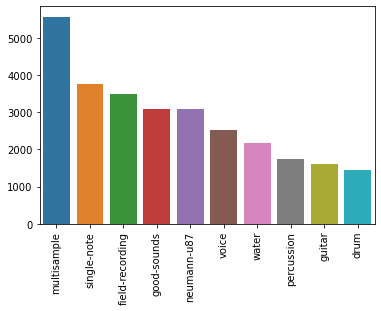

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=all_tags_series.iloc[:10].index, y=all_tags_series.iloc[:10].values)
plt.xticks(rotation=90)
plt.show()

In [47]:
# Investigating what the whole tag list description is for the most common tags: 'multisample'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'multisample':
            print(row)
            counter += 1
    if counter == 10:
        break

['distortion', 'dive', 'electric', 'free', 'guitar', 'heavy', 'metal', 'multisample', 'note', 'sample', 'sampler', 'sound', 'speed', 'thrash', 'tremolo', 'wave', 'whammy']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']


In [48]:
# Investigating what the whole tag list description is for the most common tags: 'field-recording'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'field-recording':
            print(row)
            counter += 1
    if counter == 10:
        break

['environmental-sounds-research', 'field-recording', 'train']
['bark', 'dog', 'field-recording']
['cat', 'field-recording', 'purr']
['cat', 'field-recording', 'roar']
['cat', 'field-recording', 'purr']
['beat', 'field-recording', 'kitchen', 'metal']
['bass', 'drone', 'field-recording', 'machinery']
['field-recording', 'hiss', 'noise', 'rustle', 'stove-pipe', 'wind']
['field-recording', 'hiss', 'rustle', 'stove-pipe', 'wind']
['bridge', 'canada', 'field-recording', 'montreal', 'passing', 'train']


In [49]:
# Investigating what the whole tag list description is for the most common tags: 'voice'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'voice':
            print(row)
            counter += 1
    if counter == 10:
        break

['male', 'voice']
['animal', 'growl', 'horror', 'monster', 'processed', 'voice']
['analogx', 'anderstein', 'dj', 'free', 'hip-hop', 'rap', 'sample', 'scratch', 'sound', 'vinyl', 'voice']
['boy', 'child', 'eio', 'free', 'human', 'lofi', 'sample', 'singing', 'sound', 'voice']
['female', 'human', 'phone', 'raw', 'sexy', 'voice']
['female', 'human', 'phone', 'raw', 'sexy', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'processed', 'singing', 'voice']


## Exporting Labelled Datasets

In [ ]:
#### dev_info.to_json('data/labelled_dev_info.json')
#### eval_info.to_json('data/labelled_eval_info.json')